In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE

#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
data = boston.data

In [6]:
feature_names = boston.feature_names

In [7]:
X = pd.DataFrame(data, columns=feature_names)

In [8]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.4 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [10]:
y = boston.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test

((404, 13),
 (102, 13),
 (404,),
 array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
        18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
        12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
        20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
        22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
        21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
        13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
        48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
        25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
        17.2, 22.5, 21.4]))

Масштабируйте данные с помощью StandardScaler.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_train_scaled = scaler.fit_transform(X_train)

In [16]:
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [18]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [19]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [20]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [21]:
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

In [22]:
X_train_tsne.shape

(404, 2)

Постройте диаграмму рассеяния на этих данных.

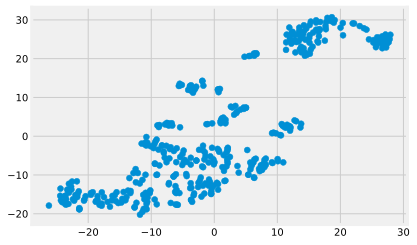

In [23]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

#### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [24]:
from sklearn.cluster import KMeans

In [25]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [26]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [27]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

In [28]:
labels_test = kmeans.predict(X_test_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Text(20, 18, 'Кластер 2')

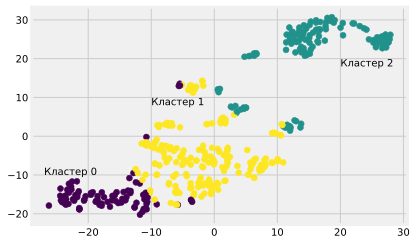

In [29]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, -10, 'Кластер 0')
plt.text(-10, 8, 'Кластер 1')
plt.text(20, 18, 'Кластер 2')

In [30]:
y_train.mean()

22.796534653465343

In [31]:
y_train[labels_train==0].mean()

27.78837209302326

In [32]:
y_train[labels_train==1].mean()

16.165354330708663

Text(0.5, 0, 'Цена')

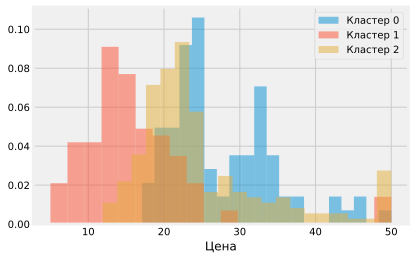

In [33]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1','Кластер 2'])
plt.xlabel('Цена')

Вычислите средние значения price и CRIM в разных кластерах.

In [34]:
y.mean()

22.532806324110677

In [35]:
y_train.shape

(404,)

In [36]:
X_train.shape

(404, 13)

In [37]:
X_train['CRIM'].mean()

3.6091246287128715

In [38]:
X_train["labels_train"]= labels_train

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
X_train.groupby("labels_train").mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
labels_train,,,,,,,,,,,,,
0,0.073566,47.587209,3.984535,0.046512,0.425809,6.648523,31.753488,6.852247,4.290698,306.918605,16.976744,388.698256,6.577093
1,10.797028,0.000000,18.759449,0.094488,0.691134,5.964008,90.340945,1.982317,20.015748,621.842520,19.662205,296.165118,18.850315
2,0.421660,3.044503,8.967749,0.068063,0.525791,6.400094,70.642408,3.651640,4.549738,302.931937,18.028796,381.651466,10.854188


In [40]:
X_train["y_train"]= y_train

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
X_train.groupby("labels_train")[['y_train']].mean()

,y_train
labels_train,
0,27.788372
1,16.165354
2,24.958115


In [42]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534884

In [43]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196851

In [44]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.4216602094240837

#### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [45]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [46]:
from sklearn.cluster import KMeans

In [47]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [48]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [49]:
pd.value_counts(labels_test)

1    53
2    35
0    14
dtype: int64

In [50]:
labels_train = kmeans.fit_predict(X_train_scaled)

Text(-2, 3, 'Кластер 2')

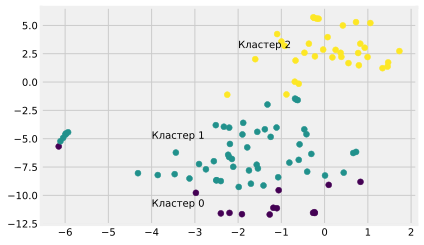

In [51]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.text(-4, -11, 'Кластер 0')
plt.text(-4, -5, 'Кластер 1')
plt.text(-2, 3, 'Кластер 2')

In [52]:
X_test['CRIM'].mean()

3.630946764705882

In [53]:
y.mean()

22.532806324110677

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [54]:
X_test["labels_test"]= labels_test

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
X_test.groupby("labels_test").mean()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
labels_test,,,,,,,,,,,,,
0,0.086186,62.857143,3.387857,0.071429,0.434079,6.949857,31.528571,6.423614,4.214286,268.428571,17.050000,391.423571,5.028571
1,0.252007,3.698113,9.278679,0.094340,0.498943,6.118057,62.337736,4.148800,4.377358,314.584906,18.809434,387.986415,11.828868
2,10.165531,0.000000,18.801429,0.000000,0.666714,5.910000,93.051429,2.056109,21.742857,654.514286,20.065714,299.925714,19.210000


In [56]:
X_test["y_test"]= y_test

C:\Python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
X_test.groupby("labels_test")[['y_test']].mean()

,y_test
labels_test,
0,33.871429
1,21.552830
2,16.437143


In [58]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.08618571428571427

In [59]:
X_test.loc[labels_test==1, 'CRIM'].mean()

0.25200716981132076

In [60]:
X_test.loc[labels_test==2, 'CRIM',].mean()

10.165531142857143

Text(0.5, 0, 'Цена')

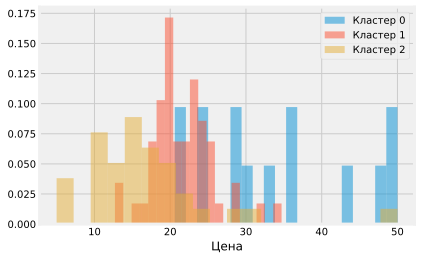

In [61]:
plt.hist(y_test[labels_test==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_test[labels_test==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_test[labels_test==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1','Кластер 2'])
plt.xlabel('Цена')